# Unsupervised learning on sleep_classifiers output data
This Jupyter Notebook assumes that you have already run Dr. Olivia Walch's <a href="https://github.com/ojwalch/sleep_classifiers">sleep_classifiers</a> preprocessor script, <a href="https://github.com/ojwalch/sleep_classifiers/tree/master/source/preprocessing">preprocessing_runner.py</a>, and that the acceleration data is stored in <code>\<jupyter_notebook_root>/motion</code>. Change the path in the second box below, otherwise; the data does have to exist within the Jupyter Lab path, though.
    
Please see also:  
__Walch, O.__ (2019). _Motion and heart rate from a wrist-worn wearable and labeled sleep from polysomnography (version 1.0.0)_. PhysioNet. https://doi.org/10.13026/hmhs-py35  
In particular, in the inital K-means clustering we choose 6 clusters, since she and her collaborators categorized study participants' state into 6 classes. In the future, I plan to use the well-known "elbow" method for choosing a _K_-value.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# Basis for comparison with tensorflow
from sklearn.cluster import KMeans

# Need to have TensorFlow 2.1+ and Keras API installed. 
#!conda install tensorflow keras
import tensorflow as tf
from tensorflow import keras

In [3]:
# Load just one of the participant's data.
accel = pd.read_csv("motion/5383425_acceleration.txt", sep=' ', names=['time', 'x', 'y', 'z'])
accel = accel.set_index('time') # Allows for intuitive time-based selection of entries using accel.loc[start_time:end_time]

In [4]:
# Polysomnography (PSG) starts at time 0. 
psg_accel = accel.loc[0:]
psg_accel.head()

,x,y,z
time,,,
0.006860,-0.308105,0.793182,-0.532013
0.106564,-0.293762,0.781433,-0.532654
0.206275,-0.316559,0.786835,-0.521866
0.306368,-0.300186,0.782410,-0.530335
0.406317,-0.308609,0.787308,-0.529053


In [5]:
psg_kmeans = KMeans(n_clusters=6) # n_clusters=6 based on Dr. Walch's paper.
psg_kmeans.fit(psg_accel)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
psg_kmeans_labels = psg_kmeans.labels_ # Note that this has 100% accuracy; we use this for some matplotlib EDA below.

In [7]:
colors = plt.cm.Spectral(np.linspace(0, 1, 6))

Text(0.5, 0, 'y accel')

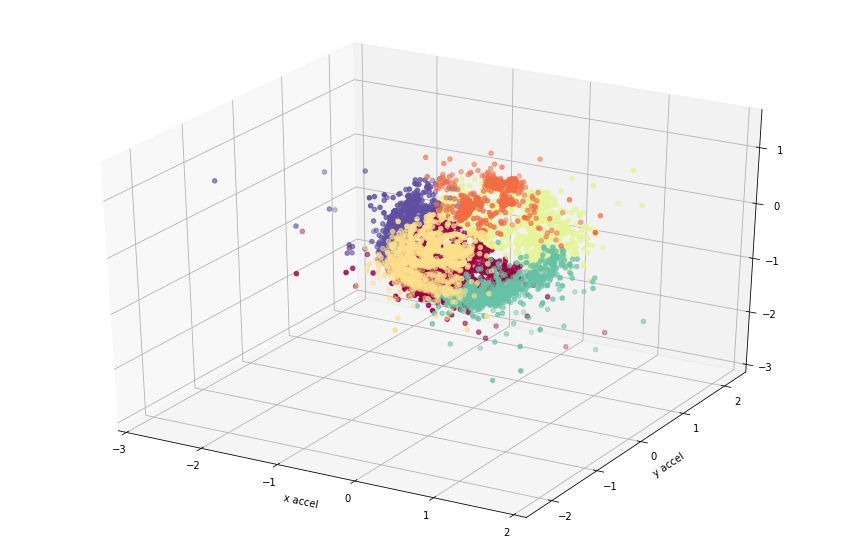

In [9]:
# Uncomment for pop-out window that's interactive. The many data points is pretty punishing to 3d render on my computers, but maybe your GPU is better...
#%matplotlib tk
# Uncomment for inline, non-interactive plotting.
%matplotlib inline 
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")

for k, col in zip(range(6), colors):
    cluster = (psg_kmeans_labels == k)
    
    ax.scatter(psg_accel['x'][cluster], psg_accel['y'][cluster], psg_accel['z'][cluster], c=[col])
 
ax.set_xlabel('x accel')
ax.set_ylabel('y accel')